# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
np.random.seed(seed=123)

In [16]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

n = 500

In [17]:
X1 = np.random.multivariate_normal(m1, sigma, n)
X2 = np.random.multivariate_normal(m2, sigma, n)
X_generative = np.concatenate([X1,X2])

In [18]:
Y_generative = np.concatenate([np.ones(n),np.zeros(n)])

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


$$p(x|y=1)=\frac{1}{{(2\pi)}^{p/2}{|\Sigma|}^{1/2}}exp(-\frac{1}{2}(x-\mu_1)^{T}\Sigma^{-1}(x-\mu_1))$$

$$p(x|y=-1)=\frac{1}{{(2\pi)}^{p/2}{|\Sigma|}^{1/2}}exp(-\frac{1}{2}(x-\mu_2)^{T}\Sigma^{-1}(x-\mu_2))$$

$$P(Y=1|X=x) = p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)} = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=-1)p(y=-1)} =$$

$$ = \frac{\pi p(x|y=1)}{\pi p(x|y=1)+(1-\pi)p(x|y=-1)} = \frac{1}{1+\frac{1-\pi}{\pi}\frac{p(x|y=-1)}{p(x|y=1)}} $$


$$ \frac{1-\pi}{\pi}\frac{p(x|y=-1)}{p(x|y=1)} = \frac{1-\pi}{\pi}\frac{exp(-\frac{1}{2}(x-\mu_2)^{T}\Sigma^{-1}(x-\mu_2))}{exp(-\frac{1}{2}(x-\mu_1)^{T}\Sigma^{-1}(x-\mu_1))} = $$

$$ = \frac{1-\pi}{\pi} exp(-\frac{1}{2}(x-\mu_2)^{T}\Sigma^{-1}(x-\mu_2)+\frac{1}{2}(x-\mu_1)^{T}\Sigma^{-1}(x-\mu_1)) = $$

$$ = exp(log(\frac{1-\pi}{\pi})+\frac{1}{2}x^{T}\Sigma^{-1}x-\frac{1}{2}{\mu_1}^{T}\Sigma^{-1}x-\frac{1}{2}x^{T}\Sigma^{-1}\mu_1+\frac{1}{2}{\mu_1}^{T}\Sigma^{-1}\mu_1 - $$

$$ - \frac{1}{2}x^{T}\Sigma^{-1}x+\frac{1}{2}{\mu_2}^{T}\Sigma^{-1}x+\frac{1}{2}x^{T}\Sigma^{-1}\mu_2-\frac{1}{2}{\mu_2}^{T}\Sigma^{-1}\mu_2) = $$

$$ = exp(log(\frac{1-\pi}{\pi})-\frac{1}{2}({\mu_2}^{T}\Sigma^{-1}\mu_2-{\mu_1}^{T}\Sigma^{-1}\mu_1)-(\mu_1-\mu_2)^{T} \Sigma^{-1}x)$$

$$p(y=1|x) = \frac{1}{1+exp(-\beta_0-\beta x)} = \frac{1}{1+exp(log(\frac{1-\pi}{\pi})-\frac{1}{2}({\mu_2}^{T}\Sigma^{-1}\mu_2-{\mu_1}^{T}\Sigma^{-1}\mu_1)-(\mu_1-\mu_2)^{T} \Sigma^{-1}x)}$$

$$-\beta_0 = log(\frac{1-\pi}{\pi})-\frac{1}{2}({\mu_2}^{T}\Sigma^{-1}\mu_2-{\mu_1}^{T}\Sigma^{-1}\mu_1)$$ 
$$ -\beta = -\Sigma^{-1}(\mu_1-\mu_2)

$$\beta_0 = log(\frac{\pi}{1-\pi})+\frac{1}{2}({\mu_2}^{T}\Sigma^{-1}\mu_2-{\mu_1}^{T}\Sigma^{-1}\mu_1)$$ 
$$\beta = \Sigma^{-1}(\mu_1-\mu_2)

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

$$\beta_0 = log(\frac{\pi}{1-\pi})+\frac{1}{2}({\mu_2}^{T}\Sigma^{-1}\mu_2-{\mu_1}^{T}\Sigma^{-1}\mu_1)$$ 
$$\beta = \Sigma^{-1}(\mu_1-\mu_2)

In [19]:
sigma_inv = np.linalg.inv(sigma)
beta = np.dot(sigma_inv, m1 - m2)

In [20]:
pi1 = 0.5
beta0 = np.log(pi1) - np.log(1 - pi1) + (m2.dot(sigma_inv.dot(m2)) - m1.dot(sigma_inv.dot(m1))) / 2

In [21]:
print(f"beta0: {beta0}\nbeta: {beta}")

beta0: -2.0
beta: [2. 2.]


In [22]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
print(mod_a.intercept_, mod_a.coef_)

[-2.05795569] [[2.15441149 2.02453956]]


### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [23]:
n = 1000
rv = np.random.binomial(1, 0.5, 1000)

In [24]:
X1 = np.random.multivariate_normal(m1, sigma, n)
X2 = np.random.multivariate_normal(m2, sigma, n)
X_discriminative = np.vstack((X1[rv == 0, :], X2[rv == 1, :]))

In [25]:
proba_y = 1 / (1 + np.exp(-(beta0 + np.dot(X_discriminative, beta))))
Y_discriminative = np.random.binomial(1, proba_y, n)

In [26]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.91298296]), array([[1.95023135, 1.91915661]]))

#### Second bullet point

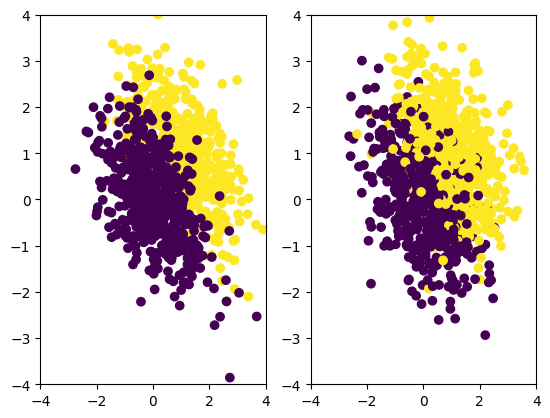

In [27]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

$$ p(y=1|x)=\frac{1}{1+exp(-\beta_0-\beta_1 x)} $$

$$ p(y=-1|x) = 1 - p(y=1|x) = \frac{1}{1+exp(\beta_0+\beta_1 x)} $$

$$ p(x|y=1) = exp(-x) $$

$$  p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1)+(1-\pi)p(x|y=-1)} $$

$$ p(x|y=-1) = \frac{\pi p(x|y=1)(1-p(y=1|x))}{(1-\pi)p(y=1|x)} = \frac{\pi p(x|y=1)p(y=-1|x)}{(1-\pi)p(y=1|x)} = $$

$$ = \frac{\pi}{1-\pi}exp(-x)\frac{1 - \frac{1}{1+exp(-\beta_0-\beta_1 x)}}{\frac{1}{1+exp(-\beta_0-\beta_1 x)}} = \frac{\pi}{1-\pi}exp(-x)exp(-\beta_0-\beta_1 x) = $$

$$ = \frac{\pi}{1-\pi}exp(-\beta_0)exp(-(\beta_1+1)x) = C_{\beta_0 \pi}exp(-(\beta_1+1)x)$$

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

$$ \frac{\pi}{1-\pi}exp(-\beta_0) = C_{\beta_0 \pi} $$

$$ \beta_0 = -log(\frac{1-\pi}{\pi} C_{\beta_0 \pi}) = -log(\frac{1-\pi}{\pi} (\beta_1+1))  

$$ \beta_0 = -log(4)$$

In [28]:
# sampling

n1 = 1000
X1 = np.random.exponential(1, size=n1)

In [29]:
beta1 = 1
n2 = 2000
X2 = np.random.exponential(1/(beta1 + 1), size=n2)

In [31]:
X = np.concatenate([X1, X2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [32]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.34737297]), array([[0.98557825]]))

In [33]:
# a numeric answer to the question about beta0
pi_c = n1 / (n1 + n2)
-np.log((1 - pi_c)/pi_c * (beta1 + 1))

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)